In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import pandas as pd

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score


# Base de datos

La base de datos es adaptada de https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81608 

os islotes de Langerhans o islotes pancreáticos son cúmulos de células que se encargan de producir hormonas como la insulina y el glucagón, con función netamente endocrina. También secretan inmunoglobulinas.

Las sustancias que producen cada una de estas células son:

- Células alfa (α): producen la hormona polipeptídica glucagón.
- Células beta (β): producen las hormonas polipeptídicas insulina y amilina (a una razón de 100:1 respectivamente).
- Células delta (δ): producen el péptido somatostatina.
- Células PP: producen un polipéptido pancreático que inhibe las secreciones exocrinas del páncreas y la motilidad del estómago y del intestino.

Los datos son la expresión (en unidades de RPKM) que se obienen de la secuenciación de ARN de células (Single cell RNA seq) de islotes humanos individuales de pancreas para determinar los transcriptomos de células pancreáticas humanas α-, β-, δ- y PP  en pacientes donantes de organos con o sin  diabetes tipo 2. 

In [2]:
annotation = pd.read_csv('Annotation_Pancreas.csv', index_col = 0)

clase1 = {'cell subtype: beta':1,'cell subtype: alpha':2,
          'cell subtype: delta':3,'cell subtype: PP':4}

Y = annotation['Sample_characteristics_ch5']


In [3]:
# El archivo se descargo de https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE81608&format=file&file=GSE81608%5Fhuman%5Fislets%5Frpkm%2Etxt%2Egz
data = pd.read_csv('GSE81608_human_islets_rpkm.txt.gz',sep = '\t', index_col = 0)
data.head()

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_1591,Sample_1592,Sample_1593,Sample_1594,Sample_1595,Sample_1596,Sample_1597,Sample_1598,Sample_1599,Sample_1600
gene.id,,,,,,,,,,,,,,,,,,,,,
1,47.3396,24.0458,2.2743,0.0,0.0000,0.0,0.0,0.000,0.0,2.0351,...,0.0,0.3304,2.4857,0.0,8.1498,0.0,0.5372,31.1225,0.0000,0.5788
2,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.254,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,47.4664,0.0000
3,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0,130.9796,0.0,0.0,0.000,0.0,79.5905,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
10,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000


In [4]:
annotation.head()

,Sample_title,Sample_geo_accession,Sample_characteristics_ch1,Sample_characteristics_ch2,Sample_characteristics_ch3,Sample_characteristics_ch4,Sample_characteristics_ch5
Sample,,,,,,,
Sample_1,Pancreatic islet cell sample 1,GSM2157899,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta
Sample_2,Pancreatic islet cell sample 2,GSM2157900,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta
Sample_3,Pancreatic islet cell sample 3,GSM2157901,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta
Sample_4,Pancreatic islet cell sample 4,GSM2157902,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta
Sample_5,Pancreatic islet cell sample 5,GSM2157903,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta


In [5]:
# Vamos a hacer un split training test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data.T, Y, train_size=0.5)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Regresión Logistica

In [23]:
tamanho = 15
C = np.logspace(0,2,tamanho)
F1_l1 = np.zeros(tamanho)
F1_l2 = np.zeros(tamanho)

for i in range(tamanho):
    
    clf_l1 = LogisticRegression(C=C[i], penalty='l1', solver='saga', tol=0.1)
    clf_l2 = LogisticRegression(C=C[i], penalty='l2', solver='saga', tol=0.1)
    clf_l1.fit(x_train, y_train)
    clf_l2.fit(x_train, y_train)
    F1_l1[i] = f1_score(y_test, clf_l1.predict(x_test), average='macro')
    F1_l2[i] = f1_score(y_test, clf_l2.predict(x_test), average='macro')

# Resultados

Text(0, 0.5, 'F1')

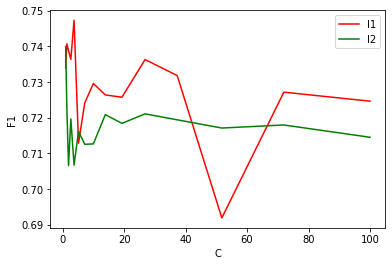

In [24]:
plt.figure()
plt.plot(C, F1_l1,  "r-",  label = 'l1')
plt.plot(C, F1_l2,  "g-", label = 'l2')
plt.legend()
plt.xlabel('C')
plt.ylabel('F1')


Text(0.5, 1.0, 'l2, C = 1.000000, F1 = 0.739986')

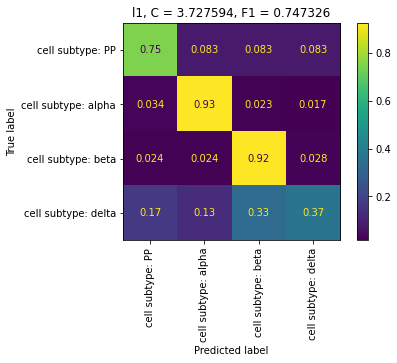

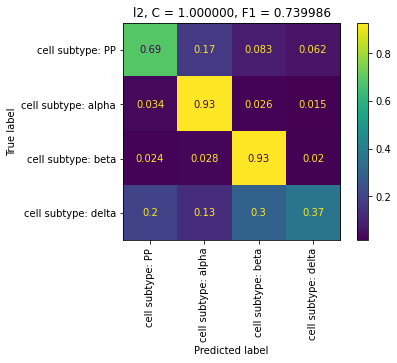

In [26]:


clf_l1 = LogisticRegression(C=C[np.argmax(F1_l1)], penalty='l1', solver='saga', tol=0.1)
clf_l2 = LogisticRegression(C=C[np.argmax(F1_l2)], penalty='l2', solver='saga', tol=0.1)

clf_l1.fit(x_train, y_train)
clf_l2.fit(x_train, y_train)

plot_confusion_matrix(clf_l1, x_test, y_test, normalize='true', xticks_rotation = 'vertical')
plt.title('l1, C = %f, F1 = %f'%(C[np.argmax(F1_l1)],np.max(F1_l1)))
plot_confusion_matrix(clf_l2, x_test, y_test, normalize='true', xticks_rotation = 'vertical')
plt.title('l2, C = %f, F1 = %f'%(C[np.argmax(F1_l2)],np.max(F1_l2)))

De acuerdo con las matrices de confusión, es claro que tanto las células  α- como las , β- se pueden clasificar claramente, sin embargo, este resultado no se obtiene con las otras dos células. Particularmente, las células δ- son las que tienden a clasificarse dentro de otros grupos. 

In [27]:
from numpy import trapz
print('Area de F1 l1 = %f' %trapz(F1_l1, C))
print('Area de F1 l2 = %f' %trapz(F1_l2, C))

Area de F1 l1 = 71.493941
Area de F1 l2 = 71.029930


La diferencia clave entre la penalización l1 (Lasso) y l2 (Ridge) es que Lasso reduce el coeficiente de las características menos importantes a cero, eliminando por completo esas características. Por lo tanto, esto funciona bien para la selección de funciones en caso de que tengamos una gran cantidad de funciones. Al final, esto ocaciona que la clasificación se de mejor en l1 que en l2. 

Respecto al valor de C, de acuerdo con la documentación de sklearn, al igual que en las máquinas de vectores de soporte, los valores más pequeños especifican una regularización más fuerte. La regularización ayuda a aplicar una penalización para aumentar la magnitud de los valores de los parámetros con el fin de reducir el sobreajuste. Es por esto que en ambos tipos de penalización, el resultado con el mejor F1 implica tener un C pequeño